In [32]:
import pandas as pd

df = pd.read_csv("Daily_Public_Transport_Passenger_Journeys_kovai_co.csv")

print(df.head())


         Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30-08-2024        16436       10705           225        19026    3925   
1  15-09-2023        15499       10671           267        18421    4519   
2  28-12-2021         1756        2352             0         3775       0   
3  11-01-2023        10536        8347           223        14072       0   
4  11-09-2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0  


In [33]:
print(df.columns)


Index(['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route',
       'School', 'Other'],
      dtype='object')


In [34]:
total_journeys = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].sum()
print("Total journeys by category:\n", total_journeys)


Total journeys by category:
 Local Route     18971696
Light Rail      13800866
Peak Service      344437
Rapid Route     24161455
School           4512469
dtype: int64


In [35]:
avg_journeys = df[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].mean()
print("Average journeys by category:\n", avg_journeys)


Average journeys by category:
 Local Route      9891.395203
Light Rail       7195.446298
Peak Service      179.581335
Rapid Route     12597.213243
School           2352.694995
dtype: float64


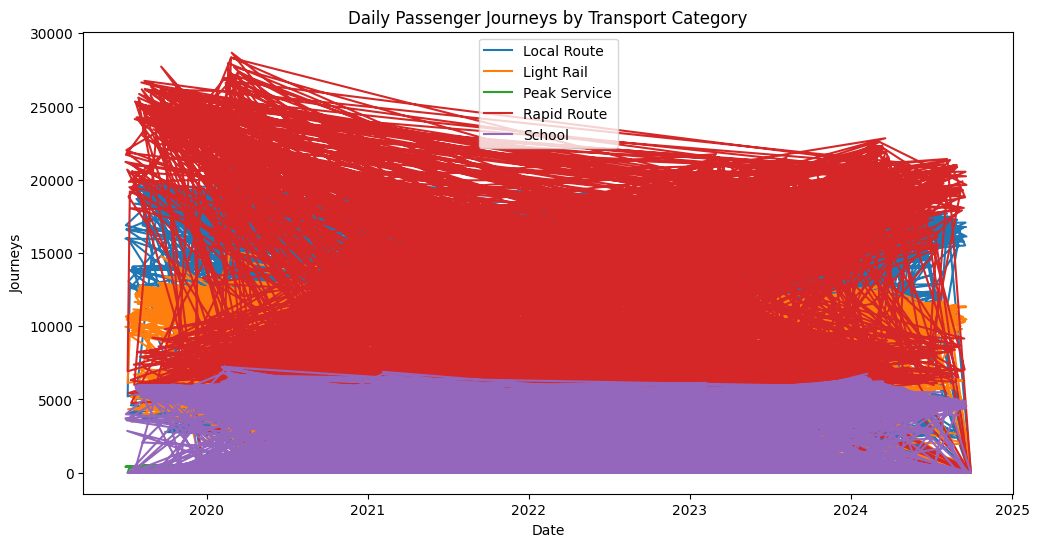

In [37]:
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
for column in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    plt.plot(df['Date'], df[column], label=column)

plt.title("Daily Passenger Journeys by Transport Category")
plt.xlabel("Date")
plt.ylabel("Journeys")
plt.legend()
plt.show()


In [38]:
peak_days = df[['Date', 'Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].idxmax()
print("Peak days for each category:\n", peak_days)


Peak days for each category:
 Date             160
Local Route     1039
Light Rail      1140
Peak Service     798
Rapid Route     1039
School           155
dtype: int64


In [40]:
!pip install prophet
from prophet import Prophet

local_route_data = df[['Date', 'Local Route']].rename(columns={"Date": "ds", "Local Route": "y"})

model = Prophet()
model.fit(local_route_data)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/bdecva14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/azbwdi_y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92138', 'data', 'file=/tmp/tmp02whbkeo/bdecva14.json', 'init=/tmp/tmp02whbkeo/azbwdi_y.json', 'output', 'file=/tmp/tmp02whbkeo/prophet_modelvzcfkjy7/prophet_model-20241128043709.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:37:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:37:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [41]:
future = model.make_future_dataframe(periods=7)

forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7))


             ds          yhat   yhat_lower    yhat_upper
1918 2024-09-30  10495.099677  6629.289102  14520.780491
1919 2024-10-01  12290.212671  8438.945762  16267.386212
1920 2024-10-02  12454.564899  8779.155068  16551.521679
1921 2024-10-03  12304.106031  8603.722155  16682.009296
1922 2024-10-04  11774.630519  7538.214034  15761.208330
1923 2024-10-05   2626.683795 -1401.947943   6517.059889
1924 2024-10-06   1701.722160 -2244.479274   5578.210632


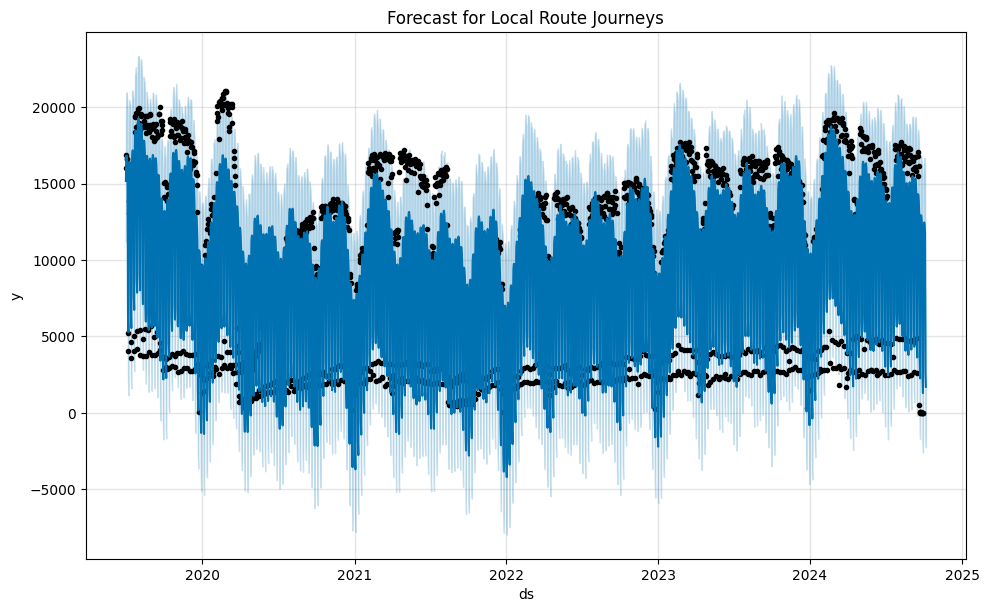

In [42]:
model.plot(forecast)
plt.title("Forecast for Local Route Journeys")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/qmt7_f_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/n1n9w20n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64866', 'data', 'file=/tmp/tmp02whbkeo/qmt7_f_d.json', 'init=/tmp/tmp02whbkeo/n1n9w20n.json', 'output', 'file=/tmp/tmp02whbkeo/prophet_modeliwe5txsm/prophet_model-20241128043813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


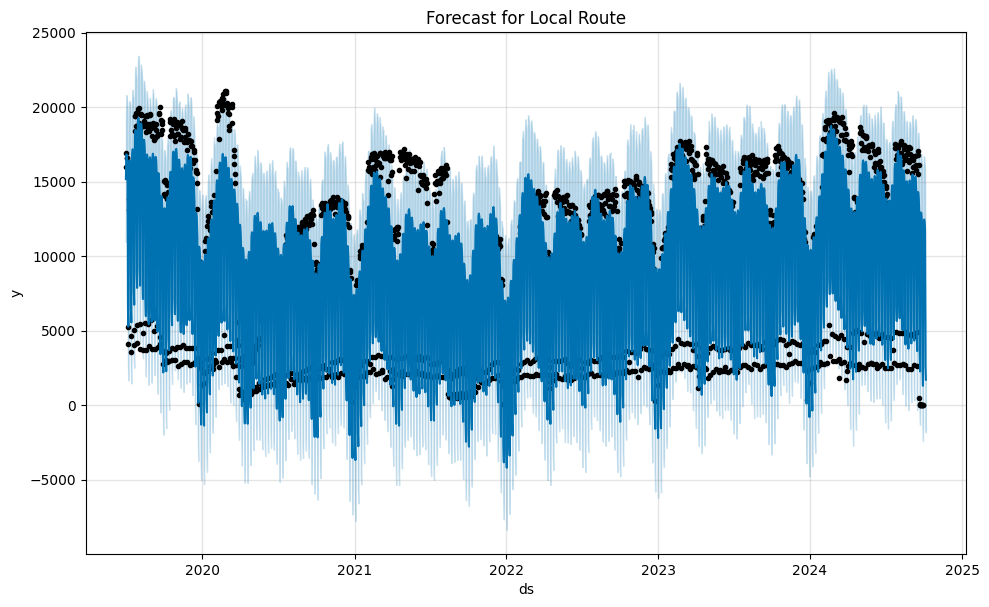

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/zwjfw4ur.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/wzyf62ud.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68723', 'data', 'file=/tmp/tmp02whbkeo/zwjfw4ur.json', 'init=/tmp/tmp02whbkeo/wzyf62ud.json', 'output', 'file=/tmp/tmp02whbkeo/prophet_modelob9fzuxk/prophet_model-20241128043815.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


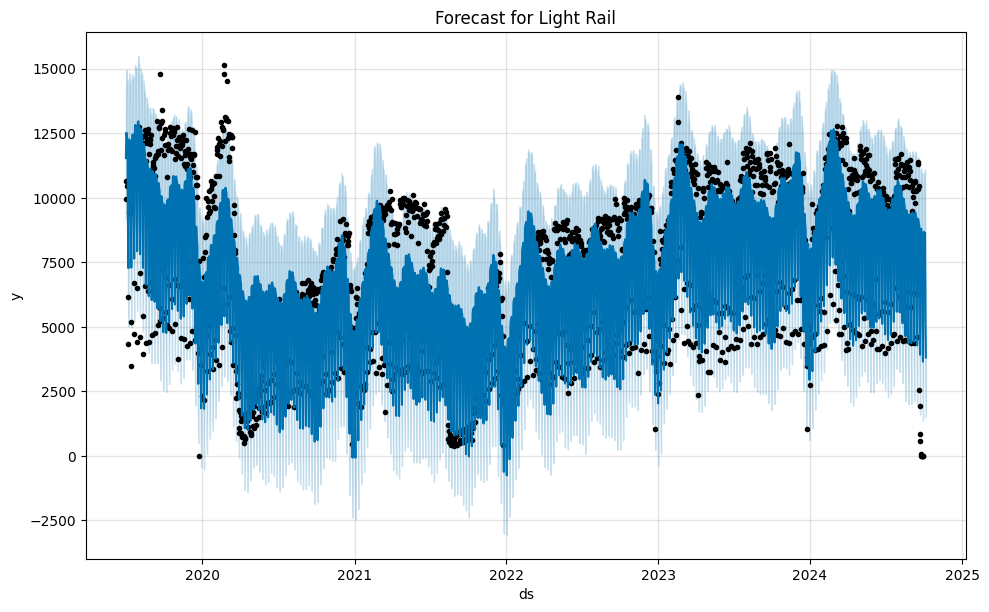

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/ecg50pdx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/8fc5ymd5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57545', 'data', 'file=/tmp/tmp02whbkeo/ecg50pdx.json', 'init=/tmp/tmp02whbkeo/8fc5ymd5.json', 'output', 'file=/tmp/tmp02whbkeo/prophet_modelzs66k511/prophet_model-20241128043816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


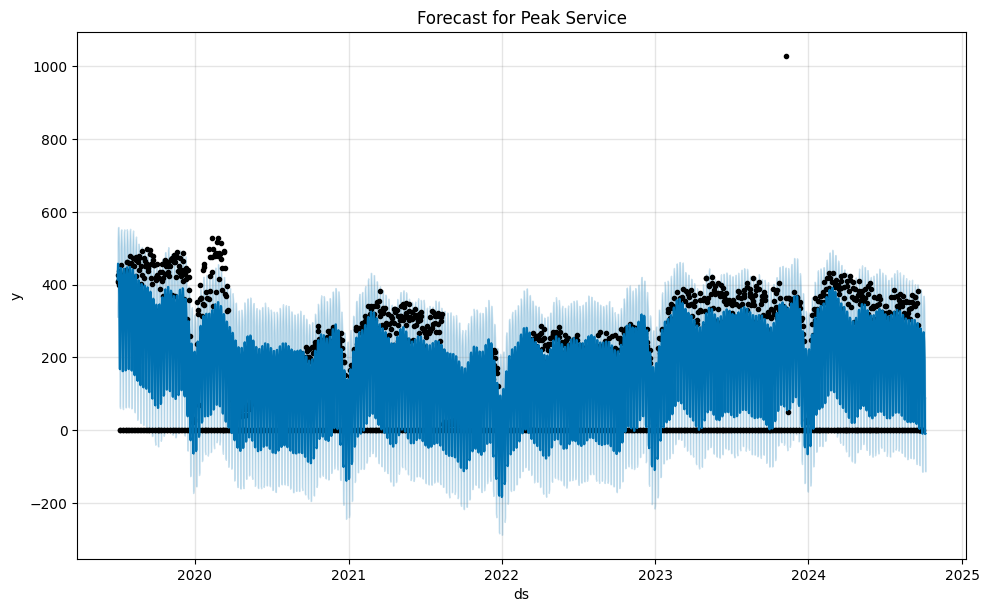

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/1eowg_2h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/0_83q_dd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23095', 'data', 'file=/tmp/tmp02whbkeo/1eowg_2h.json', 'init=/tmp/tmp02whbkeo/0_83q_dd.json', 'output', 'file=/tmp/tmp02whbkeo/prophet_model85cfrqiu/prophet_model-20241128043818.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


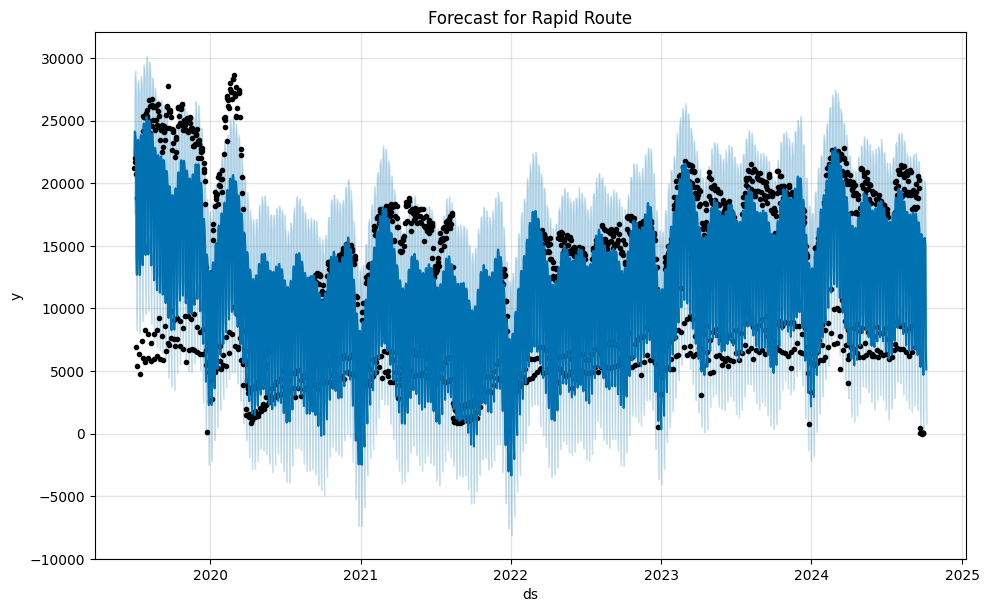

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/nrxd8gdi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp02whbkeo/3_41rik8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27030', 'data', 'file=/tmp/tmp02whbkeo/nrxd8gdi.json', 'init=/tmp/tmp02whbkeo/3_41rik8.json', 'output', 'file=/tmp/tmp02whbkeo/prophet_model7rkgt1hp/prophet_model-20241128043820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:38:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:38:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


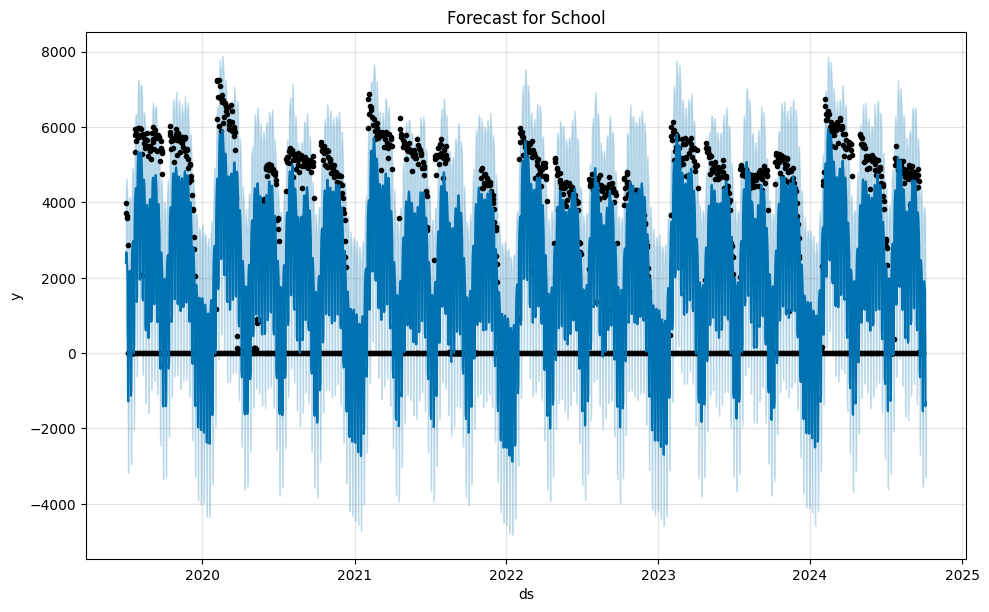

In [43]:
categories = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
forecasts = {}

for category in categories:
    data = df[['Date', category]].rename(columns={"Date": "ds", category: "y"})
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=7)
    forecast = model.predict(future)
    forecasts[category] = forecast
    model.plot(forecast)
    plt.title(f"Forecast for {category}")
    plt.show()


In [44]:
for category, forecast in forecasts.items():
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv(f"{category}_forecast.csv", index=False)


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_actual = local_route_data['y']
y_predicted = forecast['yhat'][:len(y_actual)]

rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
mae = mean_absolute_error(y_actual, y_predicted)

print(f"RMSE for Local Route: {rmse}")
print(f"MAE for Local Route: {mae}")


RMSE for Local Route: 9936.89938017431
MAE for Local Route: 8124.1049196450695
